<a href="https://colab.research.google.com/github/Rajeshprd/Bigmart_EDA/blob/main/Bigmart_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing the dataset**

In [37]:
bigmart = pd.read_csv("/content/Bigmart.csv")

#**Description of dataset**

In [3]:
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
bigmart.describe(include = "all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [6]:
bigmart.shape

(8523, 12)

In [7]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
bigmart.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# **Exploratory data analysis**

###**Finding the null values of each columns**

In [9]:
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Item_Weight  and Outlet_Size are having the null values

In [30]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

###**Finding outliers**

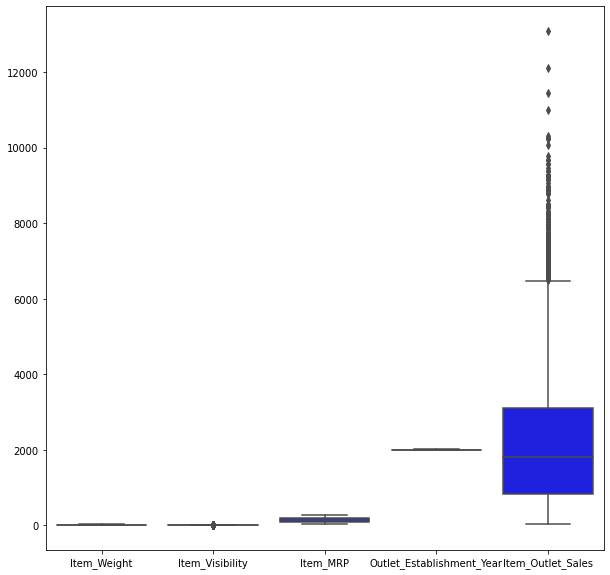

In [23]:
plt.figure(figsize=[10,10])
sns.boxplot(data = bigmart,color = 'blue')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


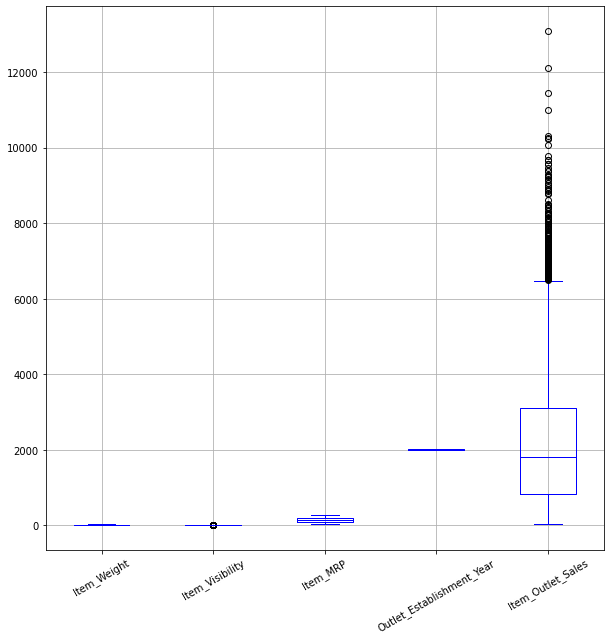

In [21]:
plt.figure(figsize=[10,10])
bigmart.boxplot(grid="False", color="blue",fontsize=10,rot=30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


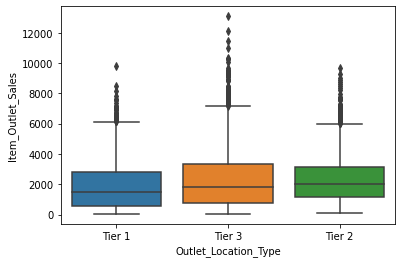

In [22]:
sns.boxplot(bigmart.Outlet_Location_Type,bigmart.Item_Outlet_Sales)
plt.show()

### Item_Identifier and Outlet_Identifieis not needed so removing the column from the dataset/dataframe using the drop function



In [40]:
bigmart.drop(["Item_Identifier", "Outlet_Identifier" ],axis = 1, inplace = True)

In [41]:
bigmart.shape

(8523, 10)

In [49]:
bigmart.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

###**Item_Weight**

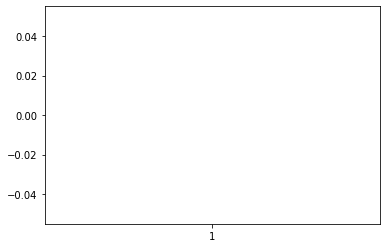

In [79]:
plt.boxplot(bigmart.Item_Weight)
plt.show()

In [52]:
bigmart.Item_Weight.isnull().sum()

1463

###continuous data without outliers

In [80]:
bigmart.Item_Weight.mean()

12.857645184136183

###imputaion by mean

In [81]:
bigmart.Item_Weight.fillna(bigmart.Item_Weight.mean(),inplace = True)

In [82]:
bigmart.Item_Weight.isnull().sum()  

0

###**Item_Fat_Content**

In [43]:
bigmart.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


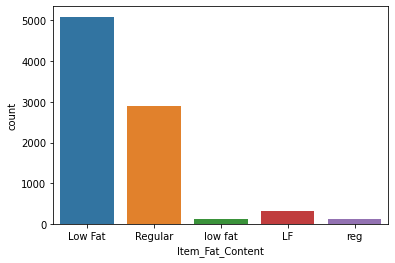

In [45]:
sns.countplot(bigmart.Item_Fat_Content)

###In this Item_Fat_Content haviing 2 fat types and which are represent in 5 ways and are replacing.
###replacing low fat with LF and str used for characters not for numbers and LF with Low Fat and reg with Regular

In [46]:
bigmart.Item_Fat_Content = bigmart.Item_Fat_Content.str.replace('low fat',"LF").str.replace('LF', "Low Fat").replace('reg', "Regular")

In [47]:
bigmart.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


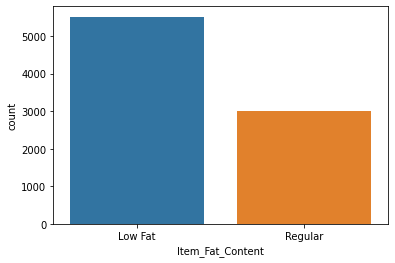

In [48]:
sns.countplot(bigmart.Item_Fat_Content)

###**Item_Visibility**

###probability of seen a particular product

In [55]:
bigmart.Item_Visibility.median()

0.05393093400000001

In [56]:
bigmart.Item_Visibility.mean()

0.06613202877895127

###incase having outliers we use the median and want to replace 0 with the median. Saving into the same column

In [57]:
bigmart.Item_Visibility = bigmart.Item_Visibility.replace(0,bigmart.Item_Visibility.median())

In [58]:
bigmart.Item_Visibility.min()

0.003574698

###**Item_Type**

In [59]:
bigmart.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [60]:
bigmart.Item_Type.nunique()

16

In [61]:
bigmart.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


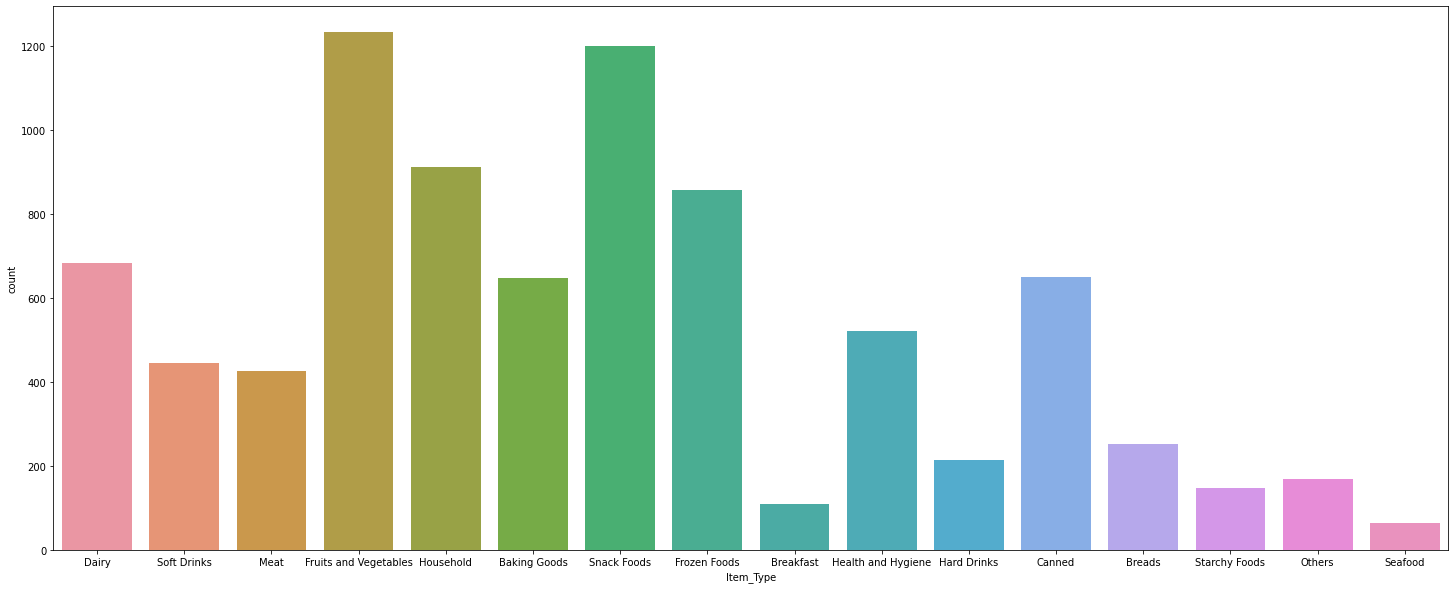

In [68]:
plt.figure(figsize=[25,10])
sns.countplot(bigmart.Item_Type)

###**Item_MRP**

###continuous data so we have to check the data having outliers or not

In [72]:
bigmart.Item_MRP.mean()

140.9927819781768

In [73]:
bigmart.Item_MRP.median()

143.0128

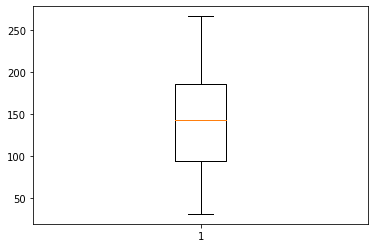

In [70]:
plt.boxplot(bigmart.Item_MRP)
plt.show()

### No outliers in Item_MRP 

###**Outlet_Establishment_Year**

In [74]:
bigmart.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [75]:
bigmart.Outlet_Establishment_Year.nunique()

9

In [76]:
bigmart.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


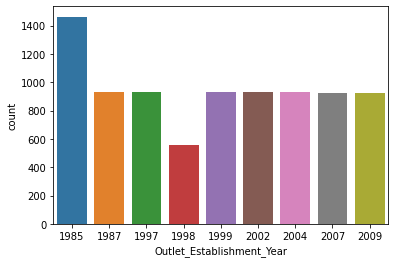

In [78]:
sns.countplot(bigmart.Outlet_Establishment_Year)
plt.show()

###**Outlet_Size**

In [83]:
bigmart.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [84]:
bigmart.Outlet_Size.isnull().sum() # having 2410 null values

2410

###Outlet_Size is discrete data with null values

###imputation by mode

In [86]:
bigmart.Outlet_Size.fillna("others",inplace = True) #imputaion by values

In [87]:
bigmart.Outlet_Size.isnull().sum()

0

###percentage of a null values

In [88]:
bigmart.isnull().mean()

Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

###**Outlet_Location_Type**

In [89]:
bigmart.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [90]:
bigmart.Outlet_Location_Type.isnull().sum() # No null values

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


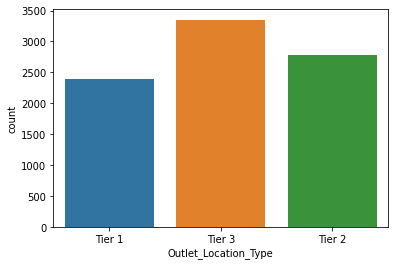

In [92]:
sns.countplot(bigmart.Outlet_Location_Type)

###**Outlet_Type**

In [93]:
bigmart.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [94]:
bigmart.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [95]:
bigmart.Outlet_Type.nunique()

4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


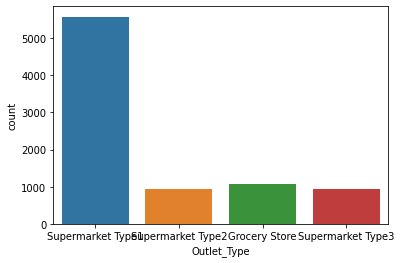

In [96]:
sns.countplot(bigmart.Outlet_Type)

###**Item_Outlet_Sales**

###it's a continuous data

In [97]:
bigmart.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

In [98]:
bigmart.Item_Outlet_Sales.isnull().sum() # No null values

0

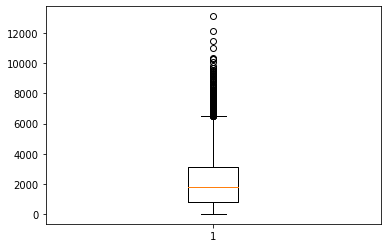

In [99]:
plt.boxplot(bigmart.Item_Outlet_Sales) 
plt.show()

###Item_Outlet_Sales having outliers

### Handing outliers in the Item_Outlet_Sales 

### Droping the outliers

In [103]:
q3 = bigmart.Item_Outlet_Sales.quantile(.75) 
q1 = bigmart.Item_Outlet_Sales.quantile(.25)
print("q3 =",q3,"q1 =",q1)

q3 = 3101.2964 q1 = 834.2474


In [104]:
iqr = q3 - q1
print("iqr =",iqr)

iqr = 2267.049


In [105]:
upper_extreme = q3 + (1.5*iqr)
lower_extreme = q1 - (1.5*iqr)
print("upper_extreme =",upper_extreme,"lower_extreme =",lower_extreme)

upper_extreme = 6501.8699 lower_extreme = -2566.3261


###Caping the outliers

In [111]:
bigmart.loc[(bigmart['Item_Outlet_Sales'] > upper_extreme),bigmart['Item_Outlet_Sales']] = upper_extreme

In [112]:
bigmart.loc[(bigmart['Item_Outlet_Sales'] < lower_extreme),bigmart['Item_Outlet_Sales']] = lower_extreme